# 신경망 학습

### 데이터로부터 학습

#### 아래 손글씨 숫자 이미지로부터 '5'를 인식하는 프로그램을 구현하려면?
    - 떠오르는 알고리즘?

#### 3가지 방법론
    - 사람이 생각하는 알고리즘
    - 사람이 생각한 특증(SIFT, HOG 등) -> 기계학습(SVM, KNN 등)
    - 신경망(딥러닝)
    
#### 규칙을 '사람'이 만드는 방식 -> '기계'가 데이터로부터 규칙(특징)을 발견해 내는 방식으로 패러다임 전환

#### 신경망의 이점
    - 모든 문제를 같은 맥락에서 풀 수 있다.
        - '5'를 인식하는 문제
        - '개'를 인식하는 문제
        - '사람 얼굴'을 인식하는 문제
        - 위 각각에 대해 특징(feature)를 별도로 지정할 필요 없음
        
        
#### 종단간 기계학습(end-to-end machine learning)
    - 데이터(입력)에서 목표한 결과(출력)을 사람의 개입 없이 얻는다.

### 훈련 데이터(training data)와 시험 데이터(test data)로 나누는 이유?
    - 범용적으로 사용할 수 있는 모델 필요
        - 범용 능력을 제대로 평가하기 위해
    - 범용(일반적) 능력
        - 생소한 데이터로도 문제를 올바르게 해결하는 능력
        - 손글씨 숫자 인식
            - '특정인'의 '특정 글자'가 아닌 '일반인'의 '일반 글자'를 인식하는 능력
    - 오버피팅(과적합, overfitting)
        - 특정 데이터 셋에 지나치게 최적화된 상태

### 손실함수
    - 신경망에서 최적의 매개변수 값을 탐색하는 '하나의 지표'
    - 신경망 성능의 '나쁨'을 나타내는 지표
        - 성능의 '나쁨'을 최소화 = 성능의 '좋음'을 최대화
    - 평균 제곱 오차
    - 교차 엔트로피 오차

#### 평균 제곱 오차(Mean Squared Error, MSE)
    - 오차에 대한 2차 방정식
    - 식 알지!! 

<img src="picture/MSE.png" />


In [12]:
# 예1: '2'' 일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [13]:
import numpy as np

In [14]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [15]:
mean_squared_error(np.array(y),np.array(t))

0.097500000000000031

In [19]:
# 예1: '2'' 일 확률이 더 높다고 추정
y = [0.1,0.05,0.7,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [17]:
mean_squared_error(np.array(y),np.array(t))
# 정답률이 올라갈 수록 mse가 줄어든 것을 알 수 있다. 0.6 -> 0.7로 증가했지!! 

0.062500000000000014

#### 교차 엔트로피 오차(Cross Entropy Error, CEE)

- 2개의 확률 분포 사이에 정의되는 척도
    - 정보 엔트로피와 닮은 꼴
- $t_k$가 ONE-HOT 인코딩이라면 정답일 때의 추정값의 자연로그를 계산하는 식

<img src="picture/CEE.png" />

In [11]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [18]:
t = [0,0,1,0,0,0,0,0,0,0]

In [21]:
# 예1: '2'' 일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [23]:
cross_entropy_error(np.array(y),np.array(t))

0.51082545709933802

In [24]:
# 예1: '2'' 일 확률이 더 높다고 추정
y = [0.1,0.05,0.7,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [25]:
cross_entropy_error(np.array(y),np.array(t))

0.35667480108159988

In [26]:
# 예2: '7'일 확률이 가장 높다고 추정된 결과
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.06,0.0,0.0]

In [27]:
cross_entropy_error(np.array(y),np.array(t))

2.3025840929945458

값이 낮을 수록 잘 예측 한거네!! 

### 미니 배치 학습

- 훈련 데디터 모두에 대한 손실함수 CEE의 합

<img src="picture/SUM_OF_CEE.png" />

- 평균을 구한다는 것은 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 다룬다는 것 => 테스트 1건당 평균오차가 나온다는 것!!

- 빅데이터 시대
    - 모든 데이터에 대해 손실함수 값을 구한다는 건 아주 시간이 많이 걸림
- 미니 배치(mini-batch) 학습
    - 훈련데이터 전체가 아닌 일부만 골라서 학습
        - np.random.choice()
    - 전체 데이터에서 무작위로 추출한 표본 -> 전체 데이터를 잘 대표

### (배치용)교차 엔트로피 오차
- 정답 레이블이 원-핫 인코딩인 경우

In [29]:
def cross_entropy_error(y,t):
    y = np.array(y) 
    t = np.array(t)
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size # sum을 한번만 쓰네!!! 

### 임의의 훈련 데이터 도는 시험 데이터 뽑기
numpy.random.choice()

In [67]:
np.random.choice(1000, 10)

array([186, 129, 445, 344, 552, 771, 774, 365, 911, 807])

In [68]:
np.random.choice(10,5)

array([9, 1, 9, 2, 7])

In [69]:
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
# dataset folder 찾네!!

In [70]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True,
                                                 one_hot_label=True)

In [71]:
print(x_train.shape)

(60000, 784)


In [72]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[29303 28559 38217 56826 17774 35314 54958 31739 41214 42386]


In [73]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [74]:
print(x_batch[0])
print(t_batch[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

- ↑정답은 9번이다!! 

#### 배치처리 할 수 있는 엔트로피!!

In [80]:
# 배치처리 할 수 있는 엔트로피!! 
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    
    return -np.sum(t * np.log(y)) / batch_size # sum을 한번만 쓰네!!! 

In [77]:
y = neuralnet_mnist.predict(network, x_batch)

In [81]:
print(y)
print(t_batch)

[[  3.61903803e-05   1.70694608e-02   9.88106709e-04   8.07787403e-02
    3.20419786e-04   1.88746899e-01   4.25580220e-05   1.74512099e-02
    6.56336427e-01   3.82299125e-02]
 [  1.52442808e-04   1.40702003e-03   9.80292737e-01   1.21675096e-02
    2.84785557e-07   2.69820826e-04   1.24263205e-03   1.47641924e-06
    4.46564285e-03   3.34375869e-07]
 [  4.27501982e-05   6.60422549e-04   3.06087236e-06   3.67871020e-04
    3.28143551e-06   9.97872829e-01   2.99357816e-05   8.71647080e-06
    1.00958522e-03   1.54234169e-06]
 [  2.28216436e-07   6.07544389e-05   6.62211141e-06   1.27277628e-04
    9.16945815e-01   6.20530627e-04   1.84832141e-04   2.18711080e-04
    9.96335177e-04   8.08387995e-02]
 [  4.45477490e-05   3.87699311e-06   7.02482590e-04   7.63635762e-05
    9.63032901e-01   3.38913669e-04   3.43625783e-04   1.53190747e-03
    2.68317130e-03   3.12422682e-02]
 [  3.38544305e-05   1.78706375e-06   3.31213407e-04   1.77189340e-05
    9.93177056e-01   1.30923319e-04   2.90849

In [82]:
cross_entropy_error(y, t_batch)

0.075214796024374669

- 엔트로피 값을 출력하였다!!!

#### 정답 레이블이 '2','7' 과 같은 숫자 레이블로 주어진 경우

In [83]:
def cross_entropy(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    
    return - np.sum(np.log(y[np.arange(batch_size), t]) / batch_size)

- 앞의 cross_entropy 만드는 2가지 방법이 차이는 무엇?
    - y값의 몇번째 column의 값이다를 t로 선택해 주는 방법이 2번째 방법이다!! 
    - 결과는 동일하다!! 

In [86]:
y = np.arange(30).reshape(3, 10)
print(y)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]


In [87]:
t = np.array([3,7,1])

In [88]:
batch_size = y.shape[0]
print(batch_size)

3


In [89]:
y[np.arange(batch_size), t]
# y 3x10 인데 t는 1차원 [3,7,1]이지.. 
# np.arange(batch_size) [0,1,2] 나오지... 1차원이다!!  
# 0번째 row의 4번째 값, 1번재 row의 8번째 값, 2번째 row의 2번재 값.

array([ 3, 17, 21])

#### 더 일반적인 형태를 보자!!
#### - 정답 레이블이 원-핫 인코딩이든 숫자 레이블이든 무관
- 원-핫 인코딩을 숫자 레이블로 변환

In [93]:
def cross_entropy_error(y, t): # m x 10 / m x 10
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size: # 원-핫 벡터인지 확인!! 
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

### 손실 함수를 설정하는 이유

- **손실 함수 vs. 정확도**, 정확도보다 손실함수를 쓴다고 한다!! 
- 가중이 매개변수에 대한 손실 함수의 미분
    - 가중치 매개변수의 값을 아주 조금 변화시킬 때, 손실 함수가 어떻게 변하나
    - 손실 함수 값 줄이기
        - 미분 값이 음수 -> 해당 가중치 매개변수를 양의 방향으로 변화
        - 미분 값이 양수 -> 해당 가중치 매개변수를 음의 방향으로 변화
        - **미분 값이 0** -> 해당 가중치 **매개변수 갱신 중단**
        - (그림 생각나야지!! '손실함수 그래프'와 '가중치 그래프')
- 신경망 학습 시 정확도를 지표로 삼아선 안 된다!!!!
    - 정확도에 대한 매개변수의 미분이 대부분의 장소에서 0이 되기 때문
    - 가중치를 조금 변화시켜도 정확도는 거의 그대로이므로
    - 계단 함수를 활성화 함수로 사용하지 않는 이유와도 일맥상통

### 계단 함수와 시그모이드 함수
- 계단 함수를 활성화 함수로 사용하지 않는 이유
    - 계단 함수: 대부분의 장소에서 기울기가 0
    - 시그모이드 함수: 어느 장소라도 기울기가 0이 아님

<img src="picture/step_sigmoid.png"/>

### 수치 미분

- 미분
    - '평균 변화량'이 아닌 '순간 변화량'
<img src="picture/diff.PNG" />    

In [95]:
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

- 미분
    - x의 '작은 변화'가 함수 f(x)를 얼마나 변화시키느냐
    - 파이썬으로 수치 미분 구현
    
    - 두가지 문제점
        - 반올림 오차(rounding error)
        - 함수의 차분과 기울기 간의 간극
      

In [105]:
np.float64(1e-50), np.float32(1e-50)

(1e-50, 0.0)

- 반올림 오차
    - 원인 : 너무 작은 값 >>> np.float32(1e-50)
    - 해결책 : h의 값으로 1e-4 사용
  
- 차분과 기울기의 간극
    - 원인 : 전방 차분
    - 해결책 : 중앙차분
    
<img src="picture/center_diff.png" />

- 개선된 파이썬 수치 미분 코드

In [119]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h) # 중앙 차분

- 수치 미분의 예
    - gradient_1d.py 참고

In [120]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
%matplotlib inline

In [123]:
x = np.arange(0.0,20.0,0.1)
y = function_1(x)

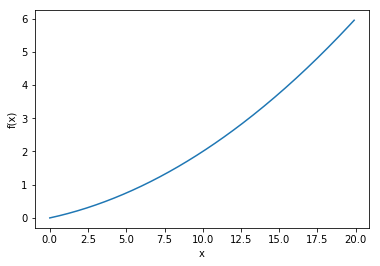

In [124]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)

In [127]:
numerical_diff(function_1, 5)

0.1999999999990898

5 지점에서 기울기가 0.2 인거다!!! 

In [135]:
def tangent_line(f, x):
    a = numerical_diff(f, x)
    print(a)
    b = f(x) - a*x
    return lambda t: a*t + b
    

In [146]:
tangent = tangent_line(function_1, 5)
tl = tangent(x) # return값 뽑음!
print(tl)

0.1999999999990898
[-0.25 -0.23 -0.21 -0.19 -0.17 -0.15 -0.13 -0.11 -0.09 -0.07 -0.05 -0.03
 -0.01  0.01  0.03  0.05  0.07  0.09  0.11  0.13  0.15  0.17  0.19  0.21
  0.23  0.25  0.27  0.29  0.31  0.33  0.35  0.37  0.39  0.41  0.43  0.45
  0.47  0.49  0.51  0.53  0.55  0.57  0.59  0.61  0.63  0.65  0.67  0.69
  0.71  0.73  0.75  0.77  0.79  0.81  0.83  0.85  0.87  0.89  0.91  0.93
  0.95  0.97  0.99  1.01  1.03  1.05  1.07  1.09  1.11  1.13  1.15  1.17
  1.19  1.21  1.23  1.25  1.27  1.29  1.31  1.33  1.35  1.37  1.39  1.41
  1.43  1.45  1.47  1.49  1.51  1.53  1.55  1.57  1.59  1.61  1.63  1.65
  1.67  1.69  1.71  1.73  1.75  1.77  1.79  1.81  1.83  1.85  1.87  1.89
  1.91  1.93  1.95  1.97  1.99  2.01  2.03  2.05  2.07  2.09  2.11  2.13
  2.15  2.17  2.19  2.21  2.23  2.25  2.27  2.29  2.31  2.33  2.35  2.37
  2.39  2.41  2.43  2.45  2.47  2.49  2.51  2.53  2.55  2.57  2.59  2.61
  2.63  2.65  2.67  2.69  2.71  2.73  2.75  2.77  2.79  2.81  2.83  2.85
  2.87  2.89  2.91  2.93  2.95  

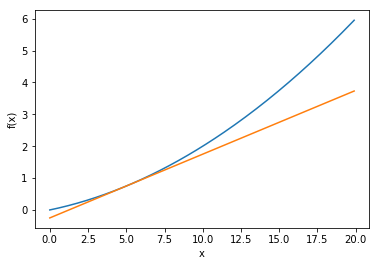

In [147]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.plot(x,tl)

- ↑ 5 지점에서 미분!! 

- 변수가 2개 이상

<img src="picture/partial_diff.png" />

In [178]:
def function_2(x): # x는 array다!! 
    return x[0]**2 + x[1]**2
    # return np.sum(x**2)

- 기울기
    - 모든 변수의 편미분을 벡터로 정리한 것

<img src="picture/grad.png" />

In [180]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [181]:

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

- ! 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향!

In [190]:
%cd ch04

C:\pydev\Machine_Learning\MLiA_py3\DeepLearning\origin\ch04


In [192]:
# importlib.reload(gradient_2d)
import gradient_2d

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


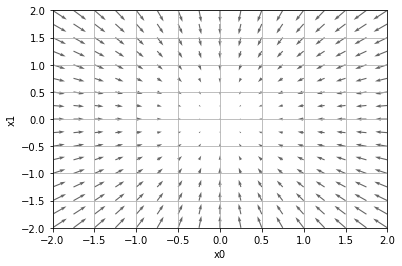

In [193]:
%run gradient_2d

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


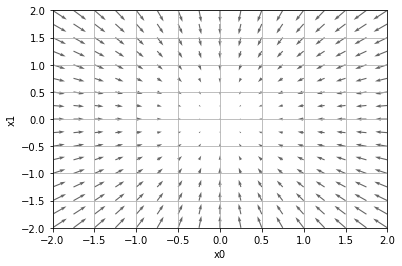

In [194]:
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

### 경사법(경사 하강법)
- 기울기를 이용, 함수의 최솟값을 찾으려는 방법
    - 기울기가 0인 지점
        - 최솟값, 극솟값, 안장점(saddle point)
- 경사 하강법(Gradient Descent)
    - 학습률

<img src="picture/Gradient Descent.png" />

1. $X_0$ 축으로 얼만큼 기울어져 있는가?
2. $X_1$ 축으로 얼만큼 기울어져 있는가?

- parameter의 다음 상태는 현재에서 그 parameter에 대한 Gradient Descent를 구해서 학습률(learning rate) 곱한것을 빼주면 된다!!!!

In [196]:
def gradient_descent(f, init_x, lr=0.01, step_num=100): # 100번 학습률은 0.01 기울기의 1%씩 움직이겠다!!!
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad # 학습률 * 기울기
        
    return x

### 경사법으로 $f(x_0, x_1) = x^2_0 + x^2_1$ 의 최솟값을 구하라

In [208]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [209]:
init_x = np.array([-3.0, 4.0]) # 시작위치 지정, 보통 랜덤하게 지정한다!! 

In [210]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

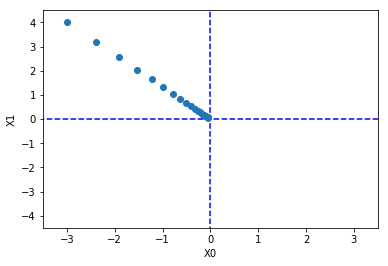

<module 'gradient_method' from 'C:\\pydev\\Machine_Learning\\MLiA_py3\\DeepLearning\\origin\\ch04\\gradient_method.py'>

In [216]:
# import gradient_method
importlib.reload(gradient_method)

In [243]:
init_x = np.array([-3.0, 4.0])

In [244]:
result, _ = gradient_method.gradient_descent(function_2, init_x, 
                                             lr=0.1, step_num=100)

In [245]:
result

array([ -6.11110793e-10,   8.14814391e-10])

- 학습률이 크면 어떻게 되나?!

In [250]:
init_x = np.array([-3.0, 4.0]) 
# 다시 지정해 줘야 한다. x의 변화가 init_x에 그대로 영향을 미치기 때문에!!!

In [247]:
result, _ = gradient_method.gradient_descent(function_2, init_x, 
                                             lr=10.0, step_num=100)

In [248]:
result # 엄청나게 먼 곳으로 가버렸다!!!

array([ -2.58983747e+13,  -1.29524862e+12])

- 학습률이 작으면?

In [251]:
init_x = np.array([-3.0, 4.0]) 
result, _ = gradient_method.gradient_descent(function_2, init_x, 
                                             lr=1e-10, step_num=100)
result # 안움직이지...

array([-2.99999994,  3.99999992])

### 파이썬 리스트 복사
init_x 값이 변동하네...

In [252]:
a = [9,2,1,4]
b = a
print(a,b)

[9, 2, 1, 4] [9, 2, 1, 4]


In [253]:
b[0] = 999
print(a,b)

[999, 2, 1, 4] [999, 2, 1, 4]


- 위와 같은 참조를 막기 위해서는

In [254]:
c = a[:] # slicing
d = list(a) # 

In [255]:
print(a is c)
print(a is b)
print(b is c)

False
True
False


In [257]:
a = [1,2,['a','b'], 3]
c = a[:]

In [258]:
a[2][1] = 'xyz'

In [260]:
print(a)
print(c) # a와 함께 변동되었네...

[1, 2, ['a', 'xyz'], 3]
[1, 2, ['a', 'xyz'], 3]


- 중첩list에 있는 것은 같이 참조되어 있어서....
- 해결법은 deepcopy 해야한다!! 

In [261]:
import copy

In [262]:
d = copy.deepcopy(a)
a[2][0] = 'abc'
print(a)
print(c)
print(d) # 변경되지 않았다. deepcopy를 사용해서!!!

[1, 2, ['abc', 'xyz'], 3]
[1, 2, ['abc', 'xyz'], 3]
[1, 2, ['a', 'xyz'], 3]


In [268]:
def func_a(x):
    my_x = x
    print(my_x)
    my_x = 200
    return my_x

In [269]:
x = 20
func_a(x)

20


200

In [270]:
print(x)

20


In [271]:
def func_a(x):
    x[0] = 0
    return x[0]

In [272]:
a = [1,2,3]

In [273]:
func_a(a)

0

In [274]:
a

[0, 2, 3]

In [275]:
b = (1,2,3)
func_a(b)

TypeError: 'tuple' object does not support item assignment

### numpy array 객체 복사

In [276]:
a = np.array([1,2,3,4])

In [277]:
b = a
print(b is a)

True


In [279]:
c = a[:]
print(c is a)

False


In [280]:
c[0] = 111
print(c)
print(a) # 중첩리스트 문제이다!! 

[111   2   3   4]
[111   2   3   4]


In [281]:
d = np.array(a)
print(d is a)

False


In [282]:
d[1] = 222
print(d)
print(a)

[111 222   3   4]
[111   2   3   4]


- np.array는 copy 나 np.array로 다시 써줘야 복제가 된다!! 

In [283]:
e = a.copy()
e[2] = 333
print(e)
print(a)

[111   2 333   4]
[111   2   3   4]


### 하이퍼파라미터
- Hyper parameter, 초매개변수
    - 학습률과 같은 파라미터
    - 가중치, 바이어스와는 다른 성질
    - 사람이 직접 설정해야 하는 파라미터
    - 여러 후보 값 중에서 시험을 통해 가장 적합한 값을 찾는 과정 필요

### 신경망에서의 기울기
- 가주치 매개변수에 대한 손실 함수의 기울기
<img src="picture/Gradient in nn.png" />

- gradient다!! 
- W 와 𝜕𝐿 / 𝜕𝑾 의 형상이 같다.
- ch04/gradient_simplenet.py의 simpleNet 클래스 - 이 파일 봄!!
- 손실 함수의 기울기에 대한 의미를 이해하자.

- weight를 살짝 조정 했을때, 손실함수의 변화를 보는 것이다!! 

In [288]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화 
                                      # self.으로 그 class의 객체로 인식하게 한다!! 
                                      # weight 값을 랜덤하게 추출해 주네. 조정은 나중에 해주고!! 
                                      # gradient descent에 의해서!!!

    def predict(self, x):
        return np.dot(x, self.W) # 행렬곱 해준다!! 

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z) # 행렬곱 한것을 softmax해서 확률로 산출하고.
        loss = cross_entropy_error(y, t) # 예상치와과 정답의 차이로 오류를 구한다!!

        return loss

In [ ]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

# x가 들어오면 t로 산출되면 좋겠다. ex) 1부분만 불 켜지도록!!!

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W) # 기울기를 구해주지!!
# 이 기울기로 손실을 최소화시키는 방향으로 weight를 조정하게 되지!!
# net.W는 simpleNet의 self.W이다!! 

print(dW)


In [290]:
import gradient_simplenet

[[ 0.06437701  0.42117678 -0.48555379]
 [ 0.09656552  0.63176516 -0.72833068]]


### 학습 알고리즘 구현하기
- 신경망 학습 절차: **SGD** 사용
    - 전제
        - 신경망에는 적응 가능한 가중치와 편향(bias)이 있고, 이 가중치와 바이어스를 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.
    - 1단계 - mini batch
        - 훈련 데이터 중 일부를 **무작위**로 가져온다.
        - 이렇게 선별된 데이터를 미니 배치라 하며, 이 미니 배치의 손실 함수 값을 줄이는 것이 목표다.
    - 2단계 - 기울기 산출
        - 미니 배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수(Weight)의 기울기를 구한다. 
        - 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
    - 3단계 - 매개변수(Weight) 갱신
        - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
    - 4단계 
        - 1~3 단계 반복

- 2층 신경망에 대해 MNIST 데이터셋을 학습하도록 구현
    - 2층 신경망 클래스 구현하기
        - ch04/two_layer_net.py 코드 참조
    - 미니 배치 학습 구현하기
        - ch04/train_neuralnet.py 코드 참조
        - 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터를 추려냄
        - 100개의 데이터에 대해 SGD를 수핸하여 매개변수 갱싱

- 2층 신경망에 대해 MNIST 데이터셋을 학습하도록 구현
    - 시험 데이터로 평가하기
        - 훈련 데이터의 손실 함수 값이 작아진다.  학습이 잘 되고 있다
        - 오버피팅 여부 확인
        - 에폭(epoch)별로 훈련 데이터와 시험 데이터에 대한 정확도 기록
            - 1 epoch: 학습 데이터를 전부 소진했을 때의 학습 데이터 수

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) # input output 정해져 있다!! 

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다. # 학습횟수이다!!!
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

# 변수 초기화!! 
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 epoch 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
# epoch은 한번에 학습이 끝나는 그 시간을 의미한다!! 
# 위 10000 반복이니 epoch를 10000번 하겠다는 거다!!

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
#     grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        # train, test 모두 정확도 계산함!! 
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


train acc, test acc | 0.0975166666667, 0.0974
train acc, test acc | 0.782833333333, 0.7878
train acc, test acc | 0.877966666667, 0.8812
train acc, test acc | 0.898516666667, 0.9034
train acc, test acc | 0.907816666667, 0.9106
train acc, test acc | 0.914783333333, 0.9171
train acc, test acc | 0.920516666667, 0.922
train acc, test acc | 0.9255, 0.9277
train acc, test acc | 0.9284, 0.9298
train acc, test acc | 0.931366666667, 0.9333
train acc, test acc | 0.934883333333, 0.9353
train acc, test acc | 0.9374, 0.9362
train acc, test acc | 0.939133333333, 0.9392
train acc, test acc | 0.941666666667, 0.9412
train acc, test acc | 0.943816666667, 0.9428
train acc, test acc | 0.946016666667, 0.9448
train acc, test acc | 0.946833333333, 0.9457


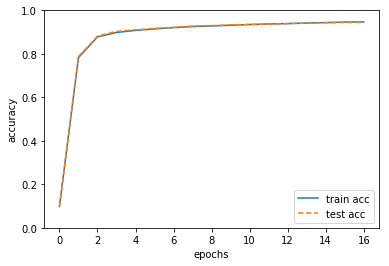

In [294]:
import train_neuralnet

In [296]:
train_neuralnet.network

In [295]:
train_neuralnet.network.params

{'W1': array([[ -5.92255766e-03,   1.29656078e-02,  -4.57447679e-03, ...,
           1.33588996e-02,   5.85148545e-03,  -1.01563186e-02],
        [  4.55414419e-04,   1.05233556e-02,   7.41450683e-05, ...,
           1.45370185e-02,  -2.76233624e-03,  -4.58430305e-03],
        [  1.38448170e-02,   4.24884107e-03,   1.27014114e-02, ...,
           1.29262473e-03,   2.21344923e-03,  -1.33988118e-02],
        ..., 
        [  1.93151525e-02,  -7.08672526e-04,   2.05893061e-02, ...,
           1.32360681e-02,  -1.45125498e-02,   1.94717508e-03],
        [ -7.11948538e-04,  -1.57821778e-02,   1.47913044e-02, ...,
           3.96758636e-03,   6.48921276e-03,  -2.23502833e-03],
        [  2.27131354e-02,   8.98364600e-03,  -3.84051572e-03, ...,
          -3.44197859e-03,  -2.02761326e-02,  -2.13575070e-03]]),
 'W2': array([[  8.52521085e-01,  -1.27017862e+00,   1.26795745e-01,
          -5.93498486e-01,   6.95840013e-02,   4.97715461e-01,
           4.85988380e-01,  -5.13899992e-01,  -3.34078

In [297]:
train_neuralnet.network.params['W1']

array([[ -5.92255766e-03,   1.29656078e-02,  -4.57447679e-03, ...,
          1.33588996e-02,   5.85148545e-03,  -1.01563186e-02],
       [  4.55414419e-04,   1.05233556e-02,   7.41450683e-05, ...,
          1.45370185e-02,  -2.76233624e-03,  -4.58430305e-03],
       [  1.38448170e-02,   4.24884107e-03,   1.27014114e-02, ...,
          1.29262473e-03,   2.21344923e-03,  -1.33988118e-02],
       ..., 
       [  1.93151525e-02,  -7.08672526e-04,   2.05893061e-02, ...,
          1.32360681e-02,  -1.45125498e-02,   1.94717508e-03],
       [ -7.11948538e-04,  -1.57821778e-02,   1.47913044e-02, ...,
          3.96758636e-03,   6.48921276e-03,  -2.23502833e-03],
       [  2.27131354e-02,   8.98364600e-03,  -3.84051572e-03, ...,
         -3.44197859e-03,  -2.02761326e-02,  -2.13575070e-03]])

In [298]:
train_neuralnet.network.params['W2']

array([[  8.52521085e-01,  -1.27017862e+00,   1.26795745e-01,
         -5.93498486e-01,   6.95840013e-02,   4.97715461e-01,
          4.85988380e-01,  -5.13899992e-01,  -3.34078401e-01,
          6.95874244e-01],
       [  9.46225829e-01,  -8.31678953e-01,   7.43281756e-01,
          4.65628117e-01,   8.19700836e-02,   7.51011594e-02,
          7.55254470e-01,  -4.63501445e-01,  -1.09300386e+00,
         -7.28247974e-01],
       [ -6.42369998e-01,   6.38905108e-01,   6.65555039e-01,
          9.54515992e-01,  -5.32612208e-01,  -1.83844536e-01,
         -5.92936433e-01,   3.00967484e-01,   5.37585593e-01,
         -1.10402776e+00],
       [ -3.80318420e-01,  -3.82863315e-01,  -6.00115036e-01,
         -2.90374924e-01,   1.60350302e-01,  -4.18032638e-01,
          4.33591805e-01,   1.38876074e+00,  -9.97621960e-01,
          1.03040822e+00],
       [ -9.96507632e-01,   6.31071518e-01,  -9.86545682e-01,
         -1.32257964e+00,   9.04700280e-01,  -2.45525380e-02,
          6.98172869e-01

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으
로 가중치 매개변수를 갱신
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용, 기
울어진 방향으로 가중치의 값을 갱신하는 작업을 반복
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라 함
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. (다소 복잡한) 오차역전파법은 기울기를 고속으로 구할 수 있다.